<a href="https://colab.research.google.com/github/lakshmims14/3D_Animation_Card/blob/main/Copy_of_Mini_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Movie Recommendation

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/movies_data/ratings.csv')
ratings = pd.read_csv('/content/drive/MyDrive/movies_data/movies.csv')

In [ ]:
movies.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [ ]:
ratings.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
df = pd.merge(movies,ratings,on='movieId')

In [ ]:
top_movies = df['title'].value_counts().nlargest(1000).index
df_small = df[df['title'].isin(top_movies)]


In [ ]:
df_small.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
5,1,34,2.0,943228491,Babe (1995),Children|Drama


In [ ]:
movie_user_matrix = df_small.pivot_table(index='title',columns='userId',values='rating').fillna(0)

In [ ]:
movie_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,200909,200910,200911,200912,200913,200914,200915,200916,200917,200918,200919,200920,200921,200922,200923,200924,200925,200926,200927,200928,200929,200930,200931,200932,200933,200934,200935,200936,200937,200938,200939,200940,200941,200942,200943,200944,200945,200946,200947,200948
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Frankenstein (1974),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Zodiac (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombieland (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_score = cosine_similarity(movie_user_matrix)

In [ ]:
similarity_df = pd.DataFrame(similarity_score,index=movie_user_matrix.index,columns=movie_user_matrix.index)

In [ ]:
similarity_df.tail()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),2012 (2009),21 Grams (2003),21 Jump Street (2012),28 Days Later (2002),28 Weeks Later (2007),300 (2007),3:10 to Yuma (2007),"40-Year-Old Virgin, The (2005)",50 First Dates (2004),8 Mile (2002),A.I. Artificial Intelligence (2001),About Time (2013),About a Boy (2002),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Adaptation (2002),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Airplane! (1980),Akira (1988),Aladdin (1992),Alice in Wonderland (1951),Alice in Wonderland (2010),Alien (1979),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),...,Watchmen (2009),"Waterboy, The (1998)",Waterworld (1995),Wayne's World (1992),Wedding Crashers (2005),"Wedding Singer, The (1998)",West Side Story (1961),What Women Want (2000),What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Whiplash (2014),Who Framed Roger Rabbit? (1988),"Whole Nine Yards, The (2000)",Wild Things (1998),Wild Wild West (1999),William Shakespeare's Romeo + Juliet (1996),Willow (1988),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)","World Is Not Enough, The (1999)",World War Z (2013),Wreck-It Ralph (2012),"Wrestler, The (2008)","X-Files: Fight the Future, The (1998)",X-Men (2000),X-Men Origins: Wolverine (2009),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Young Frankenstein (1974),0.096040,0.153641,0.151818,0.246562,0.267881,0.084136,0.082937,0.152200,0.376112,0.071781,0.127692,0.089131,0.193429,0.108821,0.138324,0.136803,0.181624,0.132381,0.118272,0.203060,0.057982,0.185864,0.309038,0.209507,0.165779,0.226464,0.195570,0.271853,0.195323,0.344665,0.235853,0.430506,0.208225,0.259244,0.256045,0.099307,0.392948,0.211877,0.360636,0.248928,...,0.138981,0.178707,0.176316,0.313648,0.161789,0.251653,0.292517,0.157622,0.220569,0.371691,0.157029,0.080952,0.364294,0.164785,0.180636,0.196065,0.176509,0.264304,0.378803,0.316342,0.440241,0.089441,0.186239,0.084877,0.112425,0.138133,0.223664,0.256641,0.093603,0.096767,0.112104,0.136726,0.216426,0.079193,0.198506,1.000000,0.133592,0.145654,0.210089,0.092551
Zodiac (2007),0.292200,0.162553,0.097544,0.125878,0.258166,0.306634,0.309986,0.099064,0.256203,0.233775,0.255743,0.291039,0.323002,0.279731,0.326421,0.326356,0.313369,0.228765,0.259711,0.255130,0.214435,0.180445,0.156175,0.164763,0.155935,0.270357,0.091521,0.148470,0.052681,0.073651,0.151660,0.198811,0.179355,0.161780,0.128396,0.216378,0.269132,0.154649,0.235875,0.169913,...,0.343835,0.145697,0.131913,0.178831,0.274380,0.139957,0.090127,0.183446,0.124548,0.142300,0.065348,0.345098,0.169248,0.157354,0.129399,0.152327,0.134917,0.110057,0.145792,0.107980,0.159162,0.364941,0.144115,0.275225,0.237529,0.353083,0.123852,0.252654,0.243990,0.269763,0.284667,0.264483,0.253020,0.246147,0.139517,0.133592,1.000000,0.336626,0.270300,0.238625
Zombieland (2009),0.344460,0.190704,0.102644,0.130619,0.207497,0.256961,0.297846,0.106090,0.217268,0.285000,0.159493,0.386976,0.394182,0.340358,0.412050,0.281885,0.359044,0.283894,0.249278,0.238799,0.233119,0.154007,0.152030,0.182052,0.177466,0.195449,0.101405,0.160144,0.044922,0.058419,0.139925,0.215335,0.186168,0.201024,0.130697,0.278597,0.292376,0.165587,0.269951,0.169927,...,0.469215,0.170504,0.149920,0.195571,0.305606,0.150525,0.0

In [ ]:
def recommend_movies(movie_name,n=5):
  if movie_name not in similarity_df.columns:
    return 'Movie Not Found'
  sim_score = similarity_df[movie_name]
  sim_score = sim_score.sort_values(ascending=False)
  return sim_score.index[1:n+1]

In [ ]:
print(recommend_movies('Young Frankenstein (1974)'))

Index(['Blazing Saddles (1974)', 'Monty Python and the Holy Grail (1975)',
       'This Is Spinal Tap (1984)', 'Raising Arizona (1987)',
       'M*A*S*H (a.k.a. MASH) (1970)'],
      dtype='object', name='title')


In [ ]:
recommend_movies("Jurassic Park (1993)")

Index(['Terminator 2: Judgment Day (1991)', 'Forrest Gump (1994)',
       'Speed (1994)', 'Fugitive, The (1993)', 'Batman (1989)'],
      dtype='object', name='title')

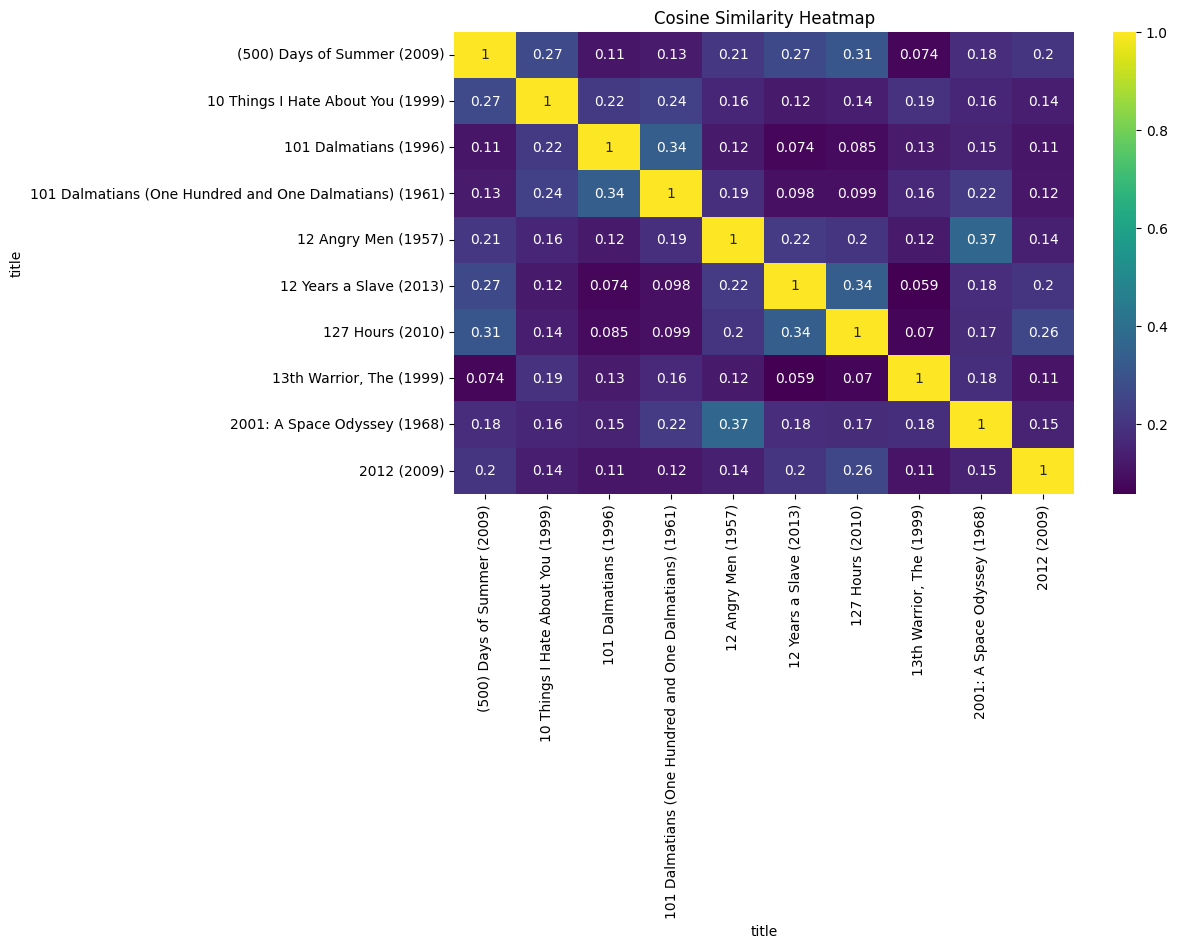

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(similarity_df.iloc[:10, :10], annot=True, cmap='viridis')
plt.title('Cosine Similarity Heatmap')
plt.show()